# Pymaceuticals Analysis:


1. Mice receiving Capomulin saw a decrease in tumor volume across the 45 day treatment, while mice receiving Infubinol, Ketapril and the placebo saw an increase in tumor volume.
2. The survival rate for mice receiving Capomulin is higher than the other treatments reviewed, and the number of metastatic sites for mice receiving Capomulin is less than the other treatments reviewed.
3. Mice receiving Ketapril and the placebo had the highest number of metastatic sites at the end of the 45 day treatment. Mice receiving Infubinol had the lowest survival rate at the end of the 45 day treatment.


In [46]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = os.path.join('data', 'mouse_drug_data.csv')
clinical_trial_data_to_load = os.path.join('data', 'clinicaltrial_data.csv')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_drug_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_data = clinical_drug_data.merge(mouse_drug_data, on = 'Mouse ID')

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [47]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
means = merged_data.groupby(['Drug', 'Timepoint']).mean()

#Convert to DataFrame
means_df = pd.DataFrame(means['Tumor Volume (mm3)'])

# Preview DataFrame
means_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [48]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sems = merged_data.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
sems_df = pd.DataFrame(sems['Tumor Volume (mm3)'])

# Preview DataFrame
sems_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [49]:
# Minor Data Munging to Re-Format the Data Frames - Means
means_df = means_df.unstack(level=0)
means_df.columns = means_df.columns.get_level_values(1)

# Preview that Reformatting worked
means_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [50]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error
sems_df = sems_df.unstack(level=0)
sems_df.columns = sems_df.columns.get_level_values(1)

# Preview that Reformatting worked
sems_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


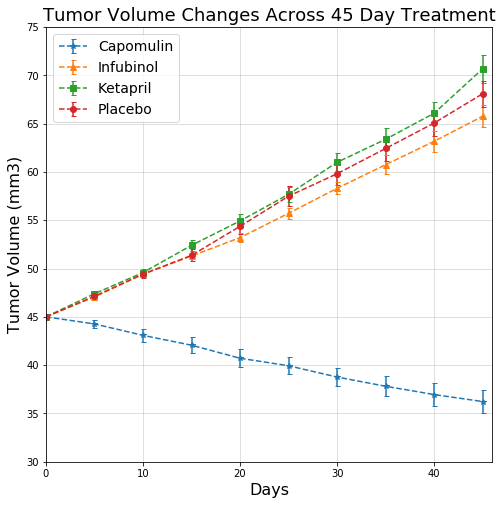

In [51]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)
plt.figure(figsize = (8,8))

plt.errorbar(x_axis, means_df['Capomulin'], sems_df['Capomulin'], fmt = '*--', capsize = 2.5, label = 'Capomulin')
plt.errorbar(x_axis, means_df['Infubinol'], sems_df['Infubinol'], fmt = '^--', capsize = 2.5, label = 'Infubinol')
plt.errorbar(x_axis, means_df['Ketapril'], sems_df['Ketapril'], fmt = 's--', capsize = 2.5, label = 'Ketapril')
plt.errorbar(x_axis, means_df['Placebo'], sems_df['Placebo'], fmt = 'o--', capsize = 2.5, label = 'Placebo')

plt.title('Tumor Volume Changes Across 45 Day Treatment', fontsize = 18)
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Tumor Volume (mm3)', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 14})

plt.xlim(0,46)
plt.ylim(30,75)

# Save the Figure
plt.savefig('Tumor_Volume_Changes.png')

In [52]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [53]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = merged_data.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_met_site['Metastatic Sites'])

# Preview DataFrame
mean_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [54]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site = merged_data.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
sem_met_site_df = pd.DataFrame(sem_met_site['Metastatic Sites'])

# Preview DataFrame
sem_met_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [55]:
# Minor Data Munging to Re-Format the Data Frames - Means
mean_met_site_df = mean_met_site_df.unstack(level=0)
mean_met_site_df.columns = mean_met_site_df.columns.get_level_values(1)

# Preview that Reformatting worked
mean_met_site_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [56]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error
sem_met_site_df = sem_met_site_df.unstack(level=0)
sem_met_site_df.columns = sem_met_site_df.columns.get_level_values(1)

# Preview that Reformatting worked
sem_met_site_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


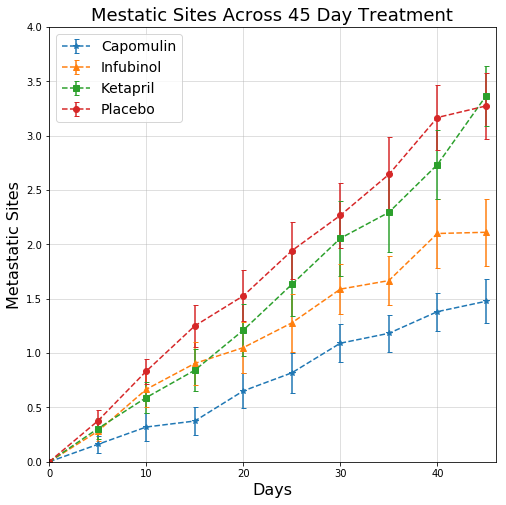

In [57]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)
plt.figure(figsize = (8,8))

plt.errorbar(x_axis, mean_met_site_df['Capomulin'], sem_met_site_df['Capomulin'], fmt = '*--', capsize = 2.5, label = 'Capomulin')
plt.errorbar(x_axis, mean_met_site_df['Infubinol'], sem_met_site_df['Infubinol'], fmt = '^--', capsize = 2.5, label = 'Infubinol')
plt.errorbar(x_axis, mean_met_site_df['Ketapril'], sem_met_site_df['Ketapril'], fmt = 's--', capsize = 2.5, label = 'Ketapril')
plt.errorbar(x_axis, mean_met_site_df['Placebo'], sem_met_site_df['Placebo'], fmt = 'o--', capsize = 2.5, label = 'Placebo')

plt.title('Mestatic Sites Across 45 Day Treatment', fontsize = 18)
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Metastatic Sites', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 14})

plt.xlim(0,46)
plt.ylim(0,4)

# Save the Figure
plt.savefig('Metastatic_Sites.png')

# Show the Figure
plt.show()

## Survival Rates

In [58]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merged_data.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count['Mouse ID'])

# Preview DataFrame
mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [59]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df = mice_count_df.unstack(level=0)
mice_count_df.columns = mice_count_df.columns.get_level_values(1)

# Preview the Data Frame
mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


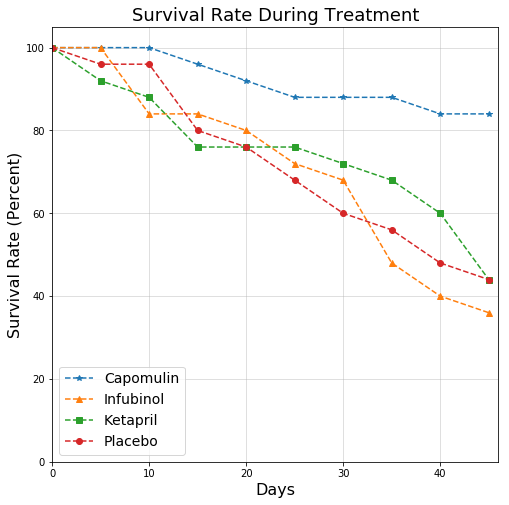

In [60]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0,50,5)
plt.figure(figsize = (8,8))

markers = ['*', '^', 's', 'o']
count = 0

for c in mice_count_df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]:
    yvals = mice_count_df[c]/mice_count_df.loc[0,c] * 100
    plt.plot(x_axis, yvals, marker = markers[count], linestyle = '--')
    count += 1

plt.title('Survival Rate During Treatment', fontsize = 18)
plt.xlabel('Days', fontsize = 16)
plt.ylabel('Survival Rate (Percent)', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 14})
    
plt.xlim(0,46)
plt.ylim(0,105)

# Save the Figure
plt.savefig('Survival_Rates.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [61]:
# Calculate the percent changes for each drug
volume_change = ((means_df.loc[45,:] - means_df.loc[0,:])/means_df.loc[0,:]) * 100

# Display the data to confirm
volume_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

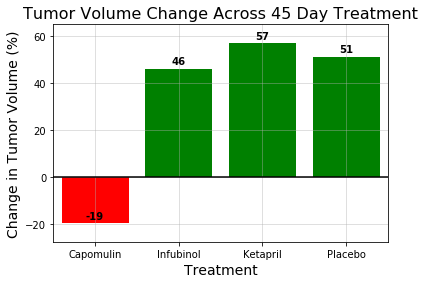

In [62]:
# Store all Relevant Percent Changes into a Tuple
heights = (volume_change['Capomulin'], volume_change['Infubinol'], volume_change['Ketapril'], volume_change['Placebo'])

# Splice the data between passing and failing drugs
colors = []

for volume in heights:
    if volume > 0:
        colors.append('green')
    else:
        colors.append('red')

# Orient widths. Add labels, tick marks, etc.
fig, ax = plt.subplots()

treatment = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

barplot = plt.bar(treatment, heights, color = colors, align='center', tick_label = treatment)

plt.title('Tumor Volume Change Across 45 Day Treatment', fontsize = 16)
plt.xlabel('Treatment', fontsize = 14)
plt.ylabel('Change in Tumor Volume (%)', fontsize = 14)

plt.grid(alpha = 0.5)
plt.axhline(y=0, color = 'black')

plt.xlim(-0.5,3.5)
plt.ylim(min(heights) - 8, max(heights) + 8)

# Use functions to label the percentages of changes, and call functions to implement the function calls - 
# Adapted from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/ 
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom', fontweight = 'bold')

autolabel(barplot, ax)

#Save the figure
plt.savefig('Percent_Changes.png')

# Show the Figure
plt.show()